In [2]:
!pip install torchsummary

In [3]:
!pip install torchvision

In [4]:
!pip install imblearn

In [5]:
import gc, os, cv2, PIL, torch
import torchvision as tv
import torch.nn as nn
import torchsummary as ts
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [ ]:
Read the labels.csv file that contains metadata on traffic sign labels

In [6]:
labels_df = pd.read_csv('/Users/ishanpant/Downloads/archive/labels.csv')
labels_df

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
Import the dataset of Images along with the labels that are needed to train and test the mode

In [7]:
x , y = [] , []  # X to store images and y to store respective labels  
data_dir = '/Users/ishanpant/Downloads/archive/myData'
for folder in range(43):
    folder_path = os.path.join(data_dir,str(folder)) # os.path.join just join both string 
    for i,img in enumerate(os.listdir(folder_path)):
        img_path = os.path.join(folder_path,img)
        # PIL load the image as PIL object and ToTensor() convert this to a Tensor
        img_tensor = tv.transforms.ToTensor()(PIL.Image.open(img_path))
        x.append(img_tensor.tolist()) # convert the tensor to list of list and append
        y.append(folder)
    print('folder of label',folder,'images loaded. Number of samples :',i+1)
x = np.array(x)
y = np.array(y)

folder of label 0 images loaded. Number of samples : 451
folder of label 1 images loaded. Number of samples : 4920
folder of label 2 images loaded. Number of samples : 2610
folder of label 3 images loaded. Number of samples : 2670
folder of label 4 images loaded. Number of samples : 3750
folder of label 5 images loaded. Number of samples : 3510
folder of label 6 images loaded. Number of samples : 780
folder of label 7 images loaded. Number of samples : 2730
folder of label 8 images loaded. Number of samples : 2670
folder of label 9 images loaded. Number of samples : 2790
folder of label 10 images loaded. Number of samples : 3810
folder of label 11 images loaded. Number of samples : 2490
folder of label 12 images loaded. Number of samples : 3990
folder of label 13 images loaded. Number of samples : 4080
folder of label 14 images loaded. Number of samples : 1470
folder of label 15 images loaded. Number of samples : 1170
folder of label 16 images loaded. Number of samples : 780
folder of 

In [ ]:
Handling Imbalanced Dataset¶

Check - dataset is balanced or not

In [8]:
# np.unique returns all the labels as one array and 
#number of samples available respect to that label as another array.
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([ 451, 4920, 2610, 2670, 3750, 3510,  780, 2730, 2670, 2790, 3810,
        2490, 3990, 4080, 1470, 1170,  780, 2100, 2280,  390,  660,  600,
         720,  960,  510, 2850, 1140,  450, 1020,  510,  840, 1470,  450,
        1288,  780, 2280,  720,  390, 3930,  570,  660,  450,  450]))

In [ ]:
So as per the above result , the dataset is very imbalanced and needed to be balanced.

Apply Over Sampling to balance the dataset

In [9]:
x = x.reshape(x.shape[0],3*32*32) # flatten x as RandomOverSampler only accepts 2-D matrix
# RandomOverSampler method duplicates samples in the minority class to balance dataset
x,y = RandomOverSampler().fit_resample(x,y)
x = x.reshape(x.shape[0],3,32,32) # reshaped again as it was
x.shape, y.shape

((211560, 3, 32, 32), (211560,))

In [ ]:
Check again - dataset is balanced or not

In [10]:
np.unique(y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920,
        4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920, 4920]))

In [ ]:
So now the dataset is balanced. Now split the dataset for training and testing

Split dataset for training and testing

In [11]:
# Stratified split on the dataset 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y)
del x,y
gc.collect() # delete x,y and free the memory 
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape # splited data shapes

((169248, 3, 32, 32), (42312, 3, 32, 32), (169248,), (42312,))

In [ ]:
Show 100 Images from train samples as a Grid using matplotlib

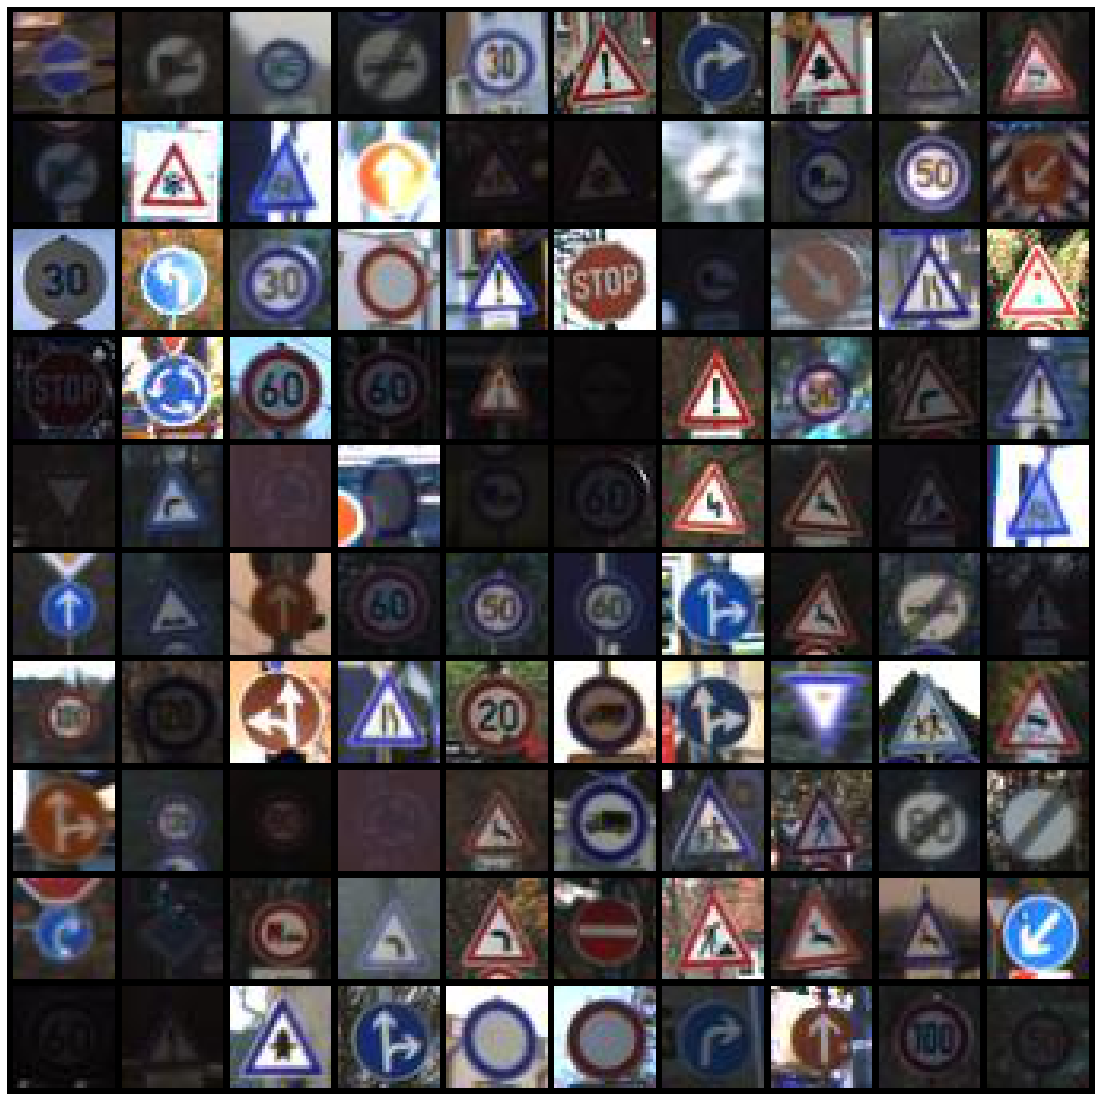



Labels of the above images :



array([17, 42,  5, 41,  1, 18, 33, 11, 29, 23, 42, 30, 29, 35, 28, 30, 41,
       10,  2, 39,  1, 34,  1, 15, 18, 14, 10, 38, 24, 26, 14, 40,  3,  3,
       26,  9, 18,  2, 20, 18, 13, 20, 40, 15, 10,  3, 21, 31, 25, 29, 35,
       22, 35,  3,  2,  3, 36, 31, 41, 18,  7,  8, 37, 24,  0, 16, 36, 13,
       28, 23, 36,  8,  5, 40, 31, 16, 28, 27,  6, 32, 33, 12, 10, 19, 19,
       17, 25, 31, 31, 39,  3, 18, 11, 36, 15, 15, 33, 35,  7,  2])

In [12]:
plt.figure(figsize=(20,20)) 
# make_grid creates a grid of 100 images and show it
plt.imshow(tv.utils.make_grid(torch.tensor(xtrain[:100]),nrow=10).permute(1,2,0))
plt.axis('off') # To remove xticks and yticks
plt.show()
print('\n\nLabels of the above images :\n')
ytrain[:100]

In [ ]:
Convert train and test data from numpy array to tensor for further computations

In [13]:
xtrain = torch.from_numpy(xtrain) 
ytrain = torch.from_numpy(ytrain)
xtest = torch.from_numpy(xtest)
ytest = torch.from_numpy(ytest)

In [14]:
pip install torchsummary


Note: you may need to restart the kernel to use updated packages.


In [ ]:
Initialized the Neural Network Mode

MPS (Metal Performance Shaders) instead of CUDA due to macos not supporting nvedia gpus.

In [15]:
import torch
import torch.nn as nn

# Check if MPS is available
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# Define the model
model = nn.Sequential(
    # 1st convolutional network Layers
    nn.Conv2d(3, 16, (2, 2), (1, 1), 'same'),   # Convolution
    nn.BatchNorm2d(16),                         # Normalization 
    nn.ReLU(True),                              # Activation
    nn.MaxPool2d((2, 2)),                      # Pooling

    # 2nd convolutional network Layers
    nn.Conv2d(16, 32, (2, 2), (1, 1), 'same'),  # Convolution
    nn.BatchNorm2d(32),                        # Normalization 
    nn.ReLU(True),                             # Activation
    nn.MaxPool2d((2, 2)),                      # Pooling

    # 3rd convolutional network Layers
    nn.Conv2d(32, 64, (2, 2), (1, 1), 'same'),  # Convolution
    nn.BatchNorm2d(64),                        # Normalization 
    nn.ReLU(True),                             # Activation
    nn.MaxPool2d((2, 2)),                      # Pooling

    # Flatten Data
    nn.Flatten(),                               # Flatten

    # Feed forward Layers
    nn.Linear(64 * 4 * 4, 256),                # Adjusted based on output
    nn.ReLU(True),                             # Activation
    nn.Linear(256, 43)                         # Linear 
)

# Move model to the selected device
model.to(device)

# Create input tensor on the chosen device
input_tensor = torch.randn(1, 3, 32, 32, device=device)  # Ensure it's on MPS device

# Forward pass to check output shape after convolutions
with torch.no_grad():
    output = model[:-2](input_tensor)  # Get the output before the last two layers
    flattened_size = output.shape[1]    # Get the size after flattening
    print(f"Output shape after flattening: {output.shape}")  # Debug output shape

# Forward pass to ensure everything works
output = model(input_tensor)  # This should not raise an error now
print("Model output shape:", output.shape)


/Users/ishanpant/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1041.)
  return F.conv2d(input, weight, bias, self.stride,


Output shape after flattening: torch.Size([1, 256])
Model output shape: torch.Size([1, 43])


In [ ]:
Define the Evaluate Function for model loss and accuracy evaluation and Train Model Function to train the model

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

def evaluate(model, data, target, batch_size=32):
    # Move model to MPS device
    device = torch.device('mps')
    model.to(device)
    
    # Create DataLoader for batching
    dataset = TensorDataset(data, target)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    # Disable gradient tracking for evaluation
    model.eval()
    total_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for batch_data, batch_target in dataloader:
            # Move batch data and target to the MPS device
            batch_data = batch_data.to(device, non_blocking=True)
            batch_target = batch_target.to(device, non_blocking=True)

            # Forward pass
            yhat = model(batch_data)  # Predict on batch data
            ypred = yhat.argmax(axis=1)  # Get predicted labels

            # Calculate loss and accuracy
            loss = nn.functional.cross_entropy(yhat, batch_target)  # Calculate the loss
            total_loss += loss.item() * batch_data.size(0)  # Accumulate loss
            correct_predictions += (ypred == batch_target).sum().item()  # Accumulate correct predictions

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(dataset)
    avg_acc = correct_predictions / len(dataset)

    # Print results
    print('Loss :', round(avg_loss, 4), '- Accuracy :', round(avg_acc, 4))

    # Clear memory
    torch.mps.empty_cache()  # Clear MPS cache

# Example usage
print('\nInitial Loss and Accuracy on Test Dataset:')
evaluate(model, xtest.float(), ytest)




Initial Loss and Accuracy on Test Dataset:
Loss : 3.4186 - Accuracy : 0.0178


In [ ]:
Define Train Model Function to train the model

In [20]:
from torch.utils.data import DataLoader, TensorDataset

def train_model(model, optimizer_class=torch.optim.Adam, epochs=5, batch_size=200, steps_per_epoch=200,
                l2_reg=0, max_lr=0.01, grad_clip=0.5):
    
    hist = [[], [], [], []]  # Initialize history for training and validation data

    # Prepare training dataset for DataLoader, ensuring xtrain is float32
    train_ds = TensorDataset(xtrain.float(), ytrain)  # Use TensorDataset for better integration
    training_dl = DataLoader(train_ds, batch_size=batch_size)  # DataLoader for training model 
    train_dl = DataLoader(train_ds, batch_size=batch_size * steps_per_epoch)  # DataLoader for epoch end evaluation

    del train_ds 
    gc.collect()  # Free up memory

    # Initialize the optimizer
    optimizer = optimizer_class(model.parameters(), weight_decay=l2_reg)

    # Initialize the scheduler for learning rate adjustment
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                 steps_per_epoch=int(steps_per_epoch * 1.01))

    # Move model to MPS device
    device = torch.device('mps')
    model.to(device)

    # Training Loop
    for epoch in range(epochs):
        print(f'\nEpoch {epoch + 1}: [', end="")
        
        # Load Batches of training data
        for step, (xb, yb) in enumerate(training_dl):
            # Move the training batch data to the MPS device and ensure float32 type
            xb = xb.to(device, dtype=torch.float32, non_blocking=True)
            yb = yb.to(device, non_blocking=True)
            
            # Forward pass
            yhat = model(xb)
            loss = nn.functional.cross_entropy(yhat, yb)
            loss.backward()
            
            # Gradient clipping
            nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            # Update weights
            optimizer.step()
            optimizer.zero_grad()

            # Update learning rate
            sched.step()

            # Clear memory
            del xb, yb, yhat
            torch.mps.empty_cache()  # Clear cache after every batch
            
            # Print training progress
            if step % (steps_per_epoch // 20) == 0:
                print('.', end='')

            # Break the loop when all steps of an epoch are completed
            if step + 1 == steps_per_epoch:
                break

        # Epoch end evaluation
        with torch.no_grad():
            # Evaluate on training data
            for xtrainb, ytrainb in train_dl:
                break

            # Move train data to the MPS device
            xtrain_cuda = xtrainb.to(device, non_blocking=True)
            ytrain_cuda = ytrainb.to(device, non_blocking=True)

            # Calculate training loss and accuracy
            yhat = model(xtrain_cuda.float())
            ypred = yhat.argmax(axis=1)
            train_loss = float(nn.functional.cross_entropy(yhat, ytrain_cuda))
            train_acc = float((ypred == ytrain_cuda).sum() / len(ytrain_cuda))

            # Clear memory
            del xtrain_cuda, ytrain_cuda, yhat, ypred
            torch.mps.empty_cache()  # Clear cache after evaluation
            
            # Move test data to MPS device, ensuring float32 type
            xtest_cuda = xtest.to(device, dtype=torch.float32, non_blocking=True)
            ytest_cuda = ytest.to(device, non_blocking=True)

            # Calculate test loss and accuracy
            yhat = model(xtest_cuda)
            ypred = yhat.argmax(axis=1)
            val_loss = float(nn.functional.cross_entropy(yhat, ytest_cuda))
            val_acc = float((ypred == ytest_cuda).sum() / len(ytest_cuda))

            # Clear memory
            del xtest_cuda, ytest_cuda, yhat, ypred
            torch.mps.empty_cache()  # Clear cache after evaluation

        # Print the captured train and test loss and accuracy at the end of every epoch
        print(f'] - Train Loss: {round(train_loss, 4)} - Train Accuracy: {round(train_acc, 4)} '
              f'- Val Loss: {round(val_loss, 4)} - Val Accuracy: {round(val_acc, 4)}')

        # Store the results in the history list
        hist[0].append(train_loss)
        hist[1].append(val_loss)
        hist[2].append(train_acc)
        hist[3].append(val_acc)

    # Create a DataFrame for the history
    history = {'Train Loss': hist[0], 'Val Loss': hist[1],
               'Train Accuracy': hist[2], 'Val Accuracy': hist[3]}
    
    return pd.DataFrame(history)

# Example usage
# Assuming xtrain, ytrain, xtest, and ytest are your datasets and are already defined



In [ ]:
Train the Model

Small batch size due to less memory.

In [26]:
history = train_model(model, optimizer_class=torch.optim.Adam, epochs=30, steps_per_epoch=200, l2_reg=0, max_lr=0.015, grad_clip=0.5, batch_size=64)



Epoch 1: [....................] - Train Loss: 0.0026 - Train Accuracy: 0.9989 - Val Loss: 0.1919 - Val Accuracy: 0.9727

Epoch 2: [....................] - Train Loss: 0.0493 - Train Accuracy: 0.9879 - Val Loss: 0.305 - Val Accuracy: 0.9565

Epoch 3: [....................] - Train Loss: 0.0515 - Train Accuracy: 0.9874 - Val Loss: 0.3006 - Val Accuracy: 0.9549

Epoch 4: [....................] - Train Loss: 0.1112 - Train Accuracy: 0.973 - Val Loss: 0.37 - Val Accuracy: 0.9379

Epoch 5: [....................] - Train Loss: 0.0487 - Train Accuracy: 0.9848 - Val Loss: 0.2383 - Val Accuracy: 0.951

Epoch 6: [....................] - Train Loss: 0.1448 - Train Accuracy: 0.9579 - Val Loss: 0.346 - Val Accuracy: 0.9222

Epoch 7: [....................] - Train Loss: 0.144 - Train Accuracy: 0.9603 - Val Loss: 0.3765 - Val Accuracy: 0.9225

Epoch 8: [....................] - Train Loss: 0.1452 - Train Accuracy: 0.9594 - Val Loss: 0.3797 - Val Accuracy: 0.9247

Epoch 9: [....................] - Trai

In [27]:
history


,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,0.002581,0.191850,0.998906,0.972726
1,0.049325,0.305014,0.987891,0.956537
2,0.051519,0.300620,0.987422,0.954883
3,0.111160,0.370041,0.973047,0.937890
4,0.048714,0.238272,0.984844,0.950960
5,0.144810,0.345993,0.957891,0.922244
6,0.144000,0.376523,0.960312,0.922481
7,0.145245,0.379666,0.959375,0.924679
8,0.154505,0.362404,0.957500,0.922788
9,0.259762,0.517198,0.937187,0.900454


In [ ]:
Visualize the Training History

In [74]:
# used plotly for interactive plotting
fig = px.line(history.iloc[:,:2],title='Loss Per Epochs',labels={'value':'Loss','index':'Epochs'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5}).show()
fig = px.line(history.iloc[:,2:],title='Accuracy Per Epochs',labels={'value':'Accuracy','index':'Epochs'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5}).show() 


In [ ]:
needed to clear space.

In [62]:
# Clear unused variables and empty the cache
torch.cuda.empty_cache()  
gc.collect()              # Call the garbage collector


0

In [ ]:
Model Classification Report on Test Data

used smaller subset due to space restrictions

In [63]:
# Use a smaller subset for evaluation
subset_size = 1000  # Adjust this number based on available memory
xtest_subset = xtest[:subset_size].to(torch.device('mps'), non_blocking=True).float()
ytest_subset = ytest[:subset_size].to(torch.device('cpu'))  # Assuming ytest is already on CPU

# Generate predictions on the subset
ypred = model(xtest_subset).argmax(axis=1)

# Move back to CPU for final evaluation
ypred = ypred.to(torch.device('cpu'), non_blocking=True)

# Calculate classification metrics and print results
print(classification_report(ytest_subset, ypred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.93      0.93      0.93        30
           2       0.78      1.00      0.88        21
           3       0.86      1.00      0.93        19
           4       0.92      0.92      0.92        24
           5       0.87      0.65      0.74        31
           6       1.00      1.00      1.00        24
           7       0.96      0.88      0.92        25
           8       0.95      0.91      0.93        23
           9       0.93      0.93      0.93        15
          10       0.91      1.00      0.95        21
          11       0.96      0.92      0.94        26
          12       1.00      1.00      1.00        22
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        29
          16       1.00      1.00      1.00        22
          17       1.00    

/Users/ishanpant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/ishanpant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/ishanpant/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
Create the Prediction Function

In [67]:

def prediction(img):
    # Load image if the input is a path
    if isinstance(img, str):
        img = tv.transforms.ToTensor()(PIL.Image.open(img))
    
    # Resize image to 32x32 as model supports this
    img = cv2.resize(img.permute(1, 2, 0).numpy(), (32, 32))
    img = torch.from_numpy(img).permute(2, 0, 1).float()  # Ensure the image is float32

    # Unsqueeze img to add batch dimension and move to device
    img_tensor = img.unsqueeze(0).to(torch.device('mps'))  # Use 'mps' for Metal Performance Shaders

    # Predict the label
    with torch.no_grad():  # Disable gradient calculation for inference
        pred = int(model(img_tensor).argmax(axis=1)[0])

    # Find the traffic sign name for label from labels_df
    pred_str = labels_df.loc[labels_df['ClassId'] == pred, 'Name'].values[0]  # Use .loc and .values for safety

    # Show the image using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.resize(img.permute(1, 2, 0).numpy(), (1000, 1000)))
    plt.axis('off')
    
    # Print recognized traffic sign
    print('\nRecognized Traffic Sign:', pred_str, '\n')



Recognized Traffic Sign: Speed limit (60km/h) 



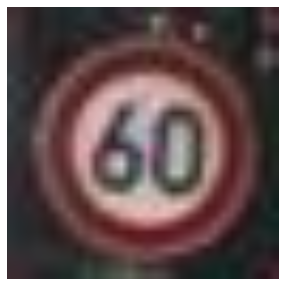

In [68]:
prediction('/Users/ishanpant/Downloads/archive/myData/3/00000_00003.jpg')


Recognized Traffic Sign: Bicycles crossing 



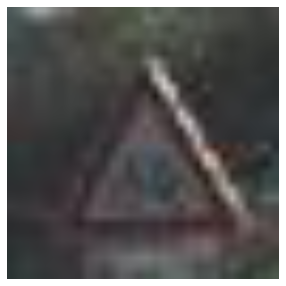

In [71]:
prediction('/Users/ishanpant/Downloads/archive/myData/29/00000_00015.jpg')


Recognized Traffic Sign: No entry 



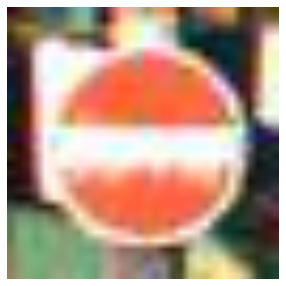

In [72]:
prediction('/Users/ishanpant/Downloads/archive/myData/17/00000_00013.jpg')

In [73]:
torch.save(model,'traffic_sign_recognition.pt')